In [1]:
import pandas as pd

In [39]:
data = pd.read_csv('clean_version2.csv',dtype = {'PRICE_NOTATION':'float','ROUNDED_NOTIONAL_AMOUNT_1':'float'})


In [40]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [41]:
data.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,Credit:Index:CDX:CDXIG,Trade,1.00,100.0
1,NEW,U,PC,Credit:Index:CDX:CDXIG,Trade,1.00,30.0
2,CORRECT,U,PC,Credit:Index:CDX:CDXIG,Trade,1.00,30.0
3,NEW,U,PC,Credit:Index:CDX:CDXIG,Novation,1.24,25.0
4,CORRECT,C,UC,Credit:Index:CDX:CDXHY,Trade,1.00,5.0


In [79]:
data.groupby('ACTION')['ACTION'].count()

ACTION
CANCEL       35
CORRECT    2997
NEW        8904
Name: ACTION, dtype: int64

In [80]:
35/data.shape[0]

0.0029323056300268094

In [42]:
data.groupby('INDICATION_OF_COLLATERALIZATION')['INDICATION_OF_COLLATERALIZATION'].count()

INDICATION_OF_COLLATERALIZATION
FC    3060
OC      57
PC    3262
UC    5557
Name: INDICATION_OF_COLLATERALIZATION, dtype: int64

In [167]:
data = data[data['INDICATION_OF_COLLATERALIZATION'] != 'OC']

In [168]:
data.groupby('INDICATION_OF_COLLATERALIZATION')['INDICATION_OF_COLLATERALIZATION'].count()

INDICATION_OF_COLLATERALIZATION
FC    3060
PC    3262
UC    5557
Name: INDICATION_OF_COLLATERALIZATION, dtype: int64

In [43]:
data.groupby('TAXONOMY')['TAXONOMY'].count()

TAXONOMY
Credit:Index:CDX:CDXHY    5064
Credit:Index:CDX:CDXIG    6872
Name: TAXONOMY, dtype: int64

In [44]:
data.groupby('PRICE_FORMING_CONTINUATION_DATA')['PRICE_FORMING_CONTINUATION_DATA'].count()

PRICE_FORMING_CONTINUATION_DATA
Amendment               857
Novation                456
Partialtermination      441
Trade                 10182
Name: PRICE_FORMING_CONTINUATION_DATA, dtype: int64

In [45]:
data.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,Credit:Index:CDX:CDXIG,Trade,1.00,100.0
1,NEW,U,PC,Credit:Index:CDX:CDXIG,Trade,1.00,30.0
2,CORRECT,U,PC,Credit:Index:CDX:CDXIG,Trade,1.00,30.0
3,NEW,U,PC,Credit:Index:CDX:CDXIG,Novation,1.24,25.0
4,CORRECT,C,UC,Credit:Index:CDX:CDXHY,Trade,1.00,5.0


In [46]:
data.replace({"Credit:Index:CDX:CDXIG":"IG","Credit:Index:CDX:CDXHY":'HY'},inplace = True)
data.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,IG,Trade,1.00,100.0
1,NEW,U,PC,IG,Trade,1.00,30.0
2,CORRECT,U,PC,IG,Trade,1.00,30.0
3,NEW,U,PC,IG,Novation,1.24,25.0
4,CORRECT,C,UC,HY,Trade,1.00,5.0


In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['CLEARED'])


LabelEncoder()

In [58]:
list(le.classes_)

['C', 'U']

In [61]:
data.dtypes

ACTION                              object
CLEARED                             object
INDICATION_OF_COLLATERALIZATION     object
TAXONOMY                            object
PRICE_FORMING_CONTINUATION_DATA     object
PRICE_NOTATION                     float64
ROUNDED_NOTIONAL_AMOUNT_1          float64
dtype: object

In [169]:
obj_data = data.select_dtypes(include=['object']).copy()

In [170]:
obj_data = obj_data.astype('category')
obj_data.dtypes

ACTION                             category
CLEARED                            category
INDICATION_OF_COLLATERALIZATION    category
TAXONOMY                           category
PRICE_FORMING_CONTINUATION_DATA    category
dtype: object

In [171]:
obj_data['ACTION'] = obj_data['ACTION'].cat.codes
obj_data['CLEARED'] = obj_data['CLEARED'].cat.codes
obj_data['INDICATION_OF_COLLATERALIZATION'] = obj_data['INDICATION_OF_COLLATERALIZATION'].cat.codes
obj_data['TAXONOMY'] = obj_data['TAXONOMY'].cat.codes
obj_data['PRICE_FORMING_CONTINUATION_DATA'] = obj_data['PRICE_FORMING_CONTINUATION_DATA'].cat.codes
obj_data.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA
0,2,1,2,1,3
1,2,1,1,1,3
2,1,1,1,1,3
3,2,1,1,1,1
4,1,0,2,0,3


In [75]:
obj_data['PRICE_NOTATION'] = data['PRICE_NOTATION']
obj_data['ROUNDED_NOTIONAL_AMOUNT_1'] = data['ROUNDED_NOTIONAL_AMOUNT_1']

In [81]:
obj_data.groupby("CLEARED")['CLEARED'].count()

CLEARED
0    6355
1    5581
Name: CLEARED, dtype: int64

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [139]:
Y = obj_data['CLEARED']
X = obj_data.drop(['CLEARED'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
clf = SVC() 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.8496649916247906
[[1034  240]
 [ 119  995]]


In [140]:
svm = LinearSVC()
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6520100502512562

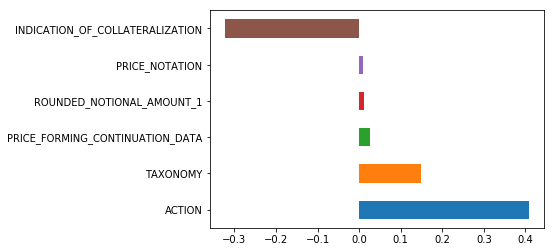

In [141]:
pd.Series(svm.coef_[0], index=X_train.columns).nlargest(10).plot(kind='barh')

In [142]:
obj_data.groupby("TAXONOMY")['TAXONOMY'].count()

TAXONOMY
0    5064
1    6872
Name: TAXONOMY, dtype: int64

In [143]:
Y = obj_data['TAXONOMY']
X = obj_data.drop(['TAXONOMY'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
clf = SVC() 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.9317420435510888
[[ 929   57]
 [ 106 1296]]


In [144]:
svm = LinearSVC()
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7307370184254607

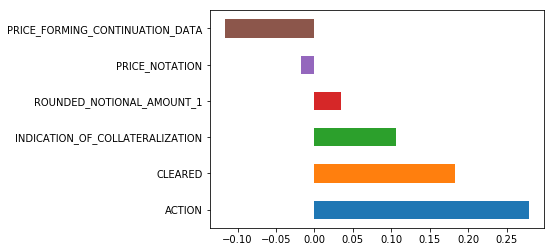

In [145]:
pd.Series(svm.coef_[0], index=X_train.columns).nlargest(10).plot(kind='barh')

In [172]:
Y = obj_data['INDICATION_OF_COLLATERALIZATION']
X = obj_data.drop(['INDICATION_OF_COLLATERALIZATION'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
clf = SVC() 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.7011784511784511
[[328 153 147]
 [130 369 133]
 [ 36 111 969]]


In [159]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = gnb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6557788944723618

In [160]:
from sklearn.naive_bayes import MultinomialNB

# create a multinomial classifier
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = mnb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6595477386934674

In [157]:
Y = obj_data['PRICE_FORMING_CONTINUATION_DATA']
X = obj_data.drop(['PRICE_FORMING_CONTINUATION_DATA'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
clf = SVC() 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.8572026800670016
[[   0    0    0  175]
 [   0    0    0   75]
 [   0    0    0   91]
 [   0    0    0 2047]]


/Users/shuang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


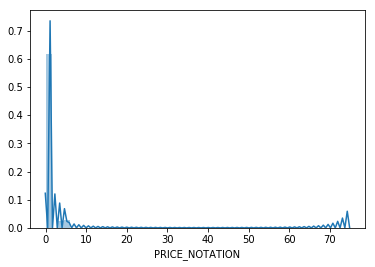

In [165]:
sns.distplot(data[data['CLEARED'] == 'C']['PRICE_NOTATION'])

/Users/shuang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


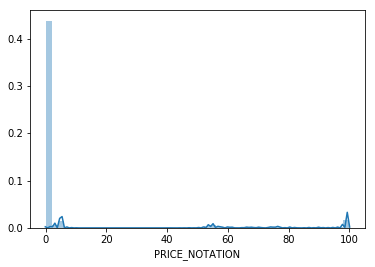

In [166]:
sns.distplot(data[data['CLEARED'] == 'U']['PRICE_NOTATION'])

In [146]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = gnb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6633165829145728

In [147]:
from sklearn.naive_bayes import MultinomialNB

# create a multinomial classifier
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = mnb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7223618090452262

In [148]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

Y_pred = bnb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6055276381909548

In [12]:
new_data.corr()

,Correct,New,U,OC,PC,UC,IG,Novation,Partialtermination,Trade,Price,Amount
Correct,1.000000,-0.992263,-0.325392,-0.037307,-0.226759,0.390693,-0.106127,-0.078109,-0.086783,0.201035,-0.092856,-0.114414
New,-0.992263,1.000000,0.318884,0.037630,0.221383,-0.386379,0.103443,0.079152,0.081648,-0.198167,0.092612,0.114227
U,-0.325392,0.318884,1.000000,-0.052737,0.419272,-0.596612,-0.061559,-0.012452,0.206339,-0.157392,0.205197,-0.034348
OC,-0.037307,0.037630,-0.052737,1.000000,-0.042480,-0.064653,0.000450,-0.013806,-0.013568,0.008156,-0.014566,0.006675
PC,-0.226759,0.221383,0.419272,-0.042480,1.000000,-0.572369,0.174954,0.050390,0.201796,-0.127778,0.061755,0.149890
UC,0.390693,-0.386379,-0.596612,-0.064653,-0.572369,1.000000,-0.003185,-0.010776,-0.116033,0.226568,-0.154733,-0.096893
IG,-0.106127,0.103443,-0.061559,0.000450,0.174954,-0.003185,1.000000,0.110068,0.065692,-0.085299,-0.072063,0.410575
Novation,-0.078109,0.079152,-0.012452,-0.013806,0.050390,-0.010776,0.110068,1.000000,-0.039037,-0.480190,-0.042794,-0.023835
Partialtermination,-0.086783,0.081648,0.206339,-0.013568,0.201796,-0.116033,0.065692,-0.039037,1.000000,-0.471918,0.339472,0.047082
Trade,0.201035,-0.198167,-0.157392,0.008156,-0.127778,0.226568,-0.085299,-0.480190,-0.471918,1.000000,-0.178081,-0.021561


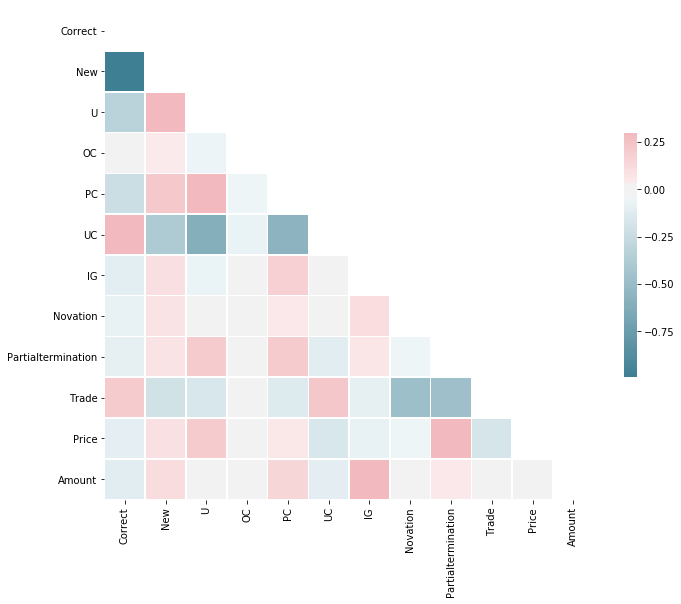

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Compute the correlation matrix
corr = new_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [8]:
action = pd.get_dummies(data= data['ACTION'], drop_first = True)
cleared = pd.get_dummies(data= data['CLEARED'], drop_first = True)
collateralization = pd.get_dummies(data= data['INDICATION_OF_COLLATERALIZATION'], drop_first = True)
taxonomy = pd.get_dummies(data = data['TAXONOMY'], drop_first = True)
price_type = pd.get_dummies(data = data['PRICE_FORMING_CONTINUATION_DATA'], drop_first = True)

In [9]:
new_data = pd.concat([action, cleared, collateralization, taxonomy, price_type, 
           data['PRICE_NOTATION'], data['ROUNDED_NOTIONAL_AMOUNT_1']],axis = 1)

In [10]:
new_data.head()

,CORRECT,NEW,U,OC,PC,UC,Credit:Index:CDX:CDXIG,Novation,Partialtermination,Trade,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,0,1,1,0,0,1,1,0,0,1,1.00,100.0
1,0,1,1,0,1,0,1,0,0,1,1.00,30.0
2,1,0,1,0,1,0,1,0,0,1,1.00,30.0
3,0,1,1,0,1,0,1,1,0,0,1.24,25.0
4,1,0,0,0,0,1,0,0,0,1,1.00,5.0


In [11]:
new_data.rename(columns = {'Credit:Index:CDX:CDXIG':'IG','PRICE_NOTATION':'Price',
                           'ROUNDED_NOTIONAL_AMOUNT_1':'Amount','CORRECT':'Correct','NEW':'New'}, inplace = True)